# Schematics

In [2]:
%matplotlib inline

# load common things
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# big figures/
mpl.rcParams['savefig.dpi'] = 2 * mpl.rcParams['savefig.dpi']

## Force balance time-series

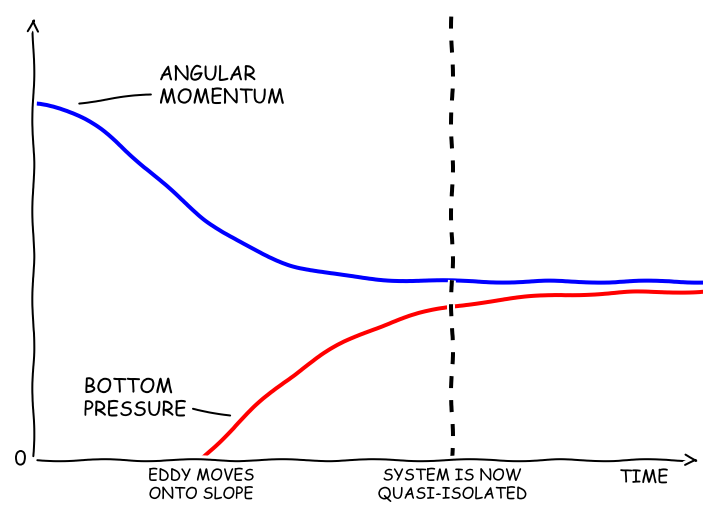

In [4]:
t = np.linspace(0,4,100)
am = 2 + 2 * np.exp(-t**2)
pbot = 1.9 * np.tanh(t-1)

with plt.xkcd():
    plt.figure()
    plt.hold(True)
    plt.plot(t, am)
    plt.plot(t, pbot)
    plt.ylim([0,5])

    # label axes
    ax = plt.gca()
    xtickloc = 2.5
    plt.xticks([1, xtickloc])
    plt.yticks([0])
    plt.axvline(xtickloc, color='k', linestyle='--')
    ax.xaxis.set_tick_params(top='off', bottom='off')
    ax.yaxis.set_tick_params(left='off', right='off')
    ax.xaxis.set_ticklabels(['EDDY MOVES\nONTO SLOPE',
                             'SYSTEM IS NOW\nQUASI-ISOLATED'], size=8)

    # Easiest to draw axes as arrows using plt.annotate()
    plt.box(None)
    xlim = plt.xlim();
    ylim = plt.ylim();
    plt.annotate('', xy=[xlim[1],ylim[0]], xytext=[0,0],
                arrowprops=dict(arrowstyle='->'))
    plt.annotate('', xy=[xlim[0],ylim[1]], xytext=[0,0],
                arrowprops=dict(arrowstyle='->'))
    
    # fake x-axis label
    dx=0.5; dy=0.25;
    loc = [xlim[1]-dx, ylim[0]-dy];
    plt.text(loc[0], loc[1], 'TIME', size=9)
    
    # label lines
    plt.annotate('ANGULAR\nMOMENTUM', xy=[0.25,4], xytext=[0.75,4],
                arrowprops=dict(arrowstyle='-'), size=10)
    plt.annotate('BOTTOM\nPRESSURE', xy=[1.2,0.50], xytext=[0.3,0.5],
                arrowprops=dict(arrowstyle='-'), size=10)
    
    plt.savefig('images/force-schematic.png', bbox_inches='tight')
        